In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
df = pd.read_csv("/content/bloodtypes.csv")

In [13]:
A = pd.DataFrame(df)
print(A)


       Country  Population     O+     A+     B+   AB+    O-    A-    B-   AB-  \
0      Albania     3074579  34.10  31.20  14.50  5.20  6.00  5.50  2.60  0.90   
1      Algeria    43576691  40.00  30.00  15.00  4.25  6.60  2.30  1.10  0.75   
2    Argentina    45479118  48.90  31.54   8.00  2.45  4.90  3.16  0.80  0.25   
3      Armenia     3021324  29.00  46.30  12.00  5.60  2.00  3.70  1.00  0.40   
4    Australia    25466459  38.00  32.00  12.00  4.00  7.00  6.00  2.00  1.00   
..         ...         ...    ...    ...    ...   ...   ...   ...   ...   ...   
121  Venezuela    28644603  58.30  28.20   5.60  1.90  3.70  1.80  0.40  0.10   
122    Vietnam    98721275  41.70  21.90  30.80  4.98  0.30  0.10  0.20  0.02   
123      Yemen    29884405  47.84  27.50  15.32  2.14  3.66  2.10  1.17  0.16   
124   Zimbabwe    14546314  63.30  18.50  14.60  0.99  1.70  0.50  0.40  0.01   
125      World  7772850805  37.37  27.24  22.83  6.22  2.69  2.09  1.16  0.40   

     Cluster  
0          0

In [24]:
B = pd.DataFrame(df)
X = B[['B+']]
kmeans = KMeans(n_clusters=2, random_state=42)
B['Cluster'] = kmeans.fit_predict(X)
print(B)

       Country  Population     O+     A+     B+   AB+    O-    A-    B-   AB-  \
0      Albania     3074579  34.10  31.20  14.50  5.20  6.00  5.50  2.60  0.90   
1      Algeria    43576691  40.00  30.00  15.00  4.25  6.60  2.30  1.10  0.75   
2    Argentina    45479118  48.90  31.54   8.00  2.45  4.90  3.16  0.80  0.25   
3      Armenia     3021324  29.00  46.30  12.00  5.60  2.00  3.70  1.00  0.40   
4    Australia    25466459  38.00  32.00  12.00  4.00  7.00  6.00  2.00  1.00   
..         ...         ...    ...    ...    ...   ...   ...   ...   ...   ...   
121  Venezuela    28644603  58.30  28.20   5.60  1.90  3.70  1.80  0.40  0.10   
122    Vietnam    98721275  41.70  21.90  30.80  4.98  0.30  0.10  0.20  0.02   
123      Yemen    29884405  47.84  27.50  15.32  2.14  3.66  2.10  1.17  0.16   
124   Zimbabwe    14546314  63.30  18.50  14.60  0.99  1.70  0.50  0.40  0.01   
125      World  7772850805  37.37  27.24  22.83  6.22  2.69  2.09  1.16  0.40   

     Cluster  
0          1

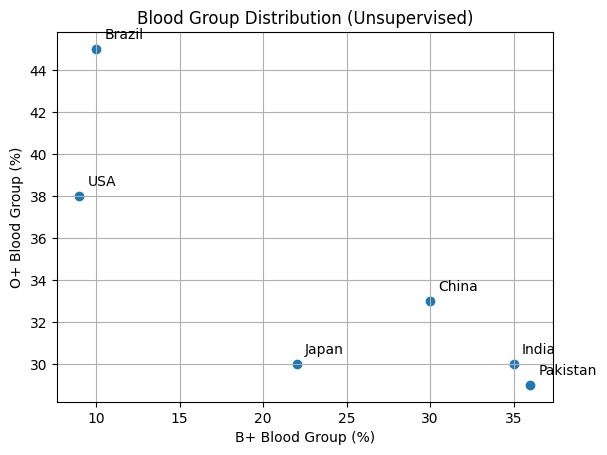

In [31]:
C= pd.DataFrame(df)
X = C[['B+', 'O+']].values
plt.figure()
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1])
for i, country in enumerate(df['Country']):
    plt.text(X[i, 0]+0.5, X[i, 1]+0.5, country)
plt.xlabel('B+ Blood Group (%)')
plt.ylabel('O+ Blood Group (%)')
plt.title('Blood Group Distribution (Unsupervised)')
plt.show()


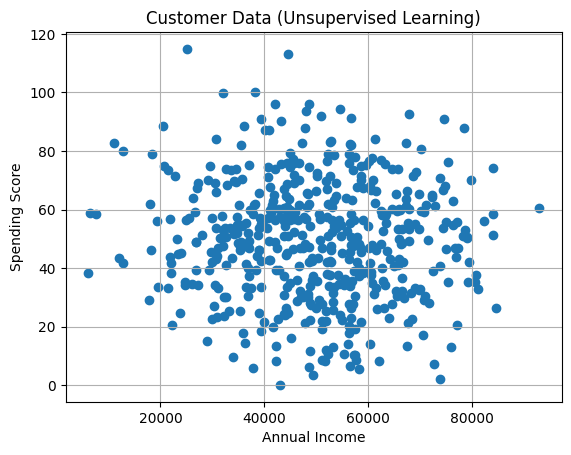

In [39]:
#By creating custom data set can train unsupervised model
income = np.random.normal(50000, 15000, 500)
spending = np.random.normal(50, 20, 500)
X = np.column_stack((income, spending))
plt.figure()
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Data (Unsupervised Learning)")
plt.show()

In [51]:
df['Average'] = X.mean(axis=1)
cluster_order = (
    df.groupby('Cluster')['Average']
    .mean()
    .sort_values()
)
cluster_labels = {
    cluster_order.index[0]: 'Low',
    cluster_order.index[1]: 'Medium',
    cluster_order.index[2]: 'High'
}
df['Blood_Level'] = df['Cluster'].map(cluster_labels)
print(df[['Country', 'B+', 'Blood_Level']])

    Country  B+ Blood_Level
0     India  35      Medium
1     China  30        High
2       USA   9         Low
3     Japan  22        High
4    Brazil  10         Low
5  Pakistan  36      Medium
